In [1]:
import matplotlib.pyplot as pyplot
import numpy

In [2]:
pointsFile = open("punkty.csv", 'r')
points = []
for line in pointsFile:
    line = line.strip()
    line = line.split(',')
    point = (float(line[0]), float(line[1]))
    points.append(point)

In [3]:
def f(t):
    return (t + 3.6) * (t - 2.1) * (t - 3.7)

In [4]:
myPoints = range(-4, 6)

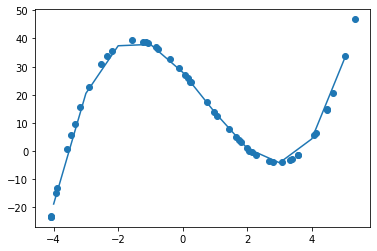

In [5]:
T = [point[0] for point in points]
Y = [point[1] for point in points]

F = [f(t) for t in myPoints]
pyplot.scatter(T, Y)
pyplot.plot(myPoints, F)

In [6]:
def map_list(f, x): 
    return list(map(f,x))

def diff_quot(x, f):
    n = len(x) - 1
    result = map_list(f, x)
    for i in range(1, n+1):
        for j in range(n, i-1, -1):
            result[j] = (result[j] - result[j - 1]) / ( x[j] - x[j-i] )
    return result

In [7]:
sortedT = sorted(T)

In [8]:
def aux(t):
    return Y[T.index(t)]

b = diff_quot(sortedT, aux)

def Newton(t, b, x):
    k = len(b)
    p = 1
    L = 0
    for i in range(k):
        L += b[i] * p
        p *= (t - x[i])

    return L

In [9]:
newtonPoints = [Newton(t, b, sortedT) for t in sortedT]

(-60, 60)

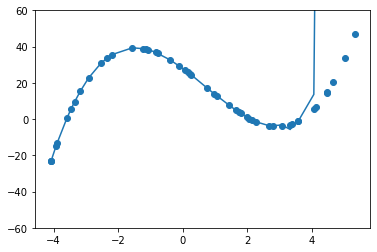

In [10]:
pyplot.scatter(T, Y)
pyplot.plot(sortedT, newtonPoints)
pyplot.ylim(-60, 60)

In [11]:
#źródło kodu: https://www.python-course.eu/python3_memoization.php

class Memoize:

    def __init__(self, fn):
        self.fn = fn
        self.memo = {}

    def __call__(self, *args):
        if args not in self.memo:
            self.memo[args] = self.fn(*args)
        return self.memo[args]

In [12]:
X = T

In [13]:
@Memoize
def dotProduct(f, g):
    s = 0
    for x in X:
        s += f(x) * g(x)
    return s

In [14]:
def c(k):
    return dotProduct(lambda y : y * P(k - 1)(y), P(k - 1)) / dotProduct(P(k - 1), P(k - 1))

In [15]:
def d(k):
    return dotProduct(P(k - 1), P(k - 1)) / dotProduct(P(k - 2), P(k - 2))

In [16]:
@Memoize
def auxP(x, k):
    if k == 0:
        return 1
    if k == 1:
        return x - c(1)
    return (x - c(k)) * auxP(x, k - 1) - d(k) * auxP(x, k - 2)

def P(k):
    return lambda x : auxP(x, k)

In [17]:
def a(k):
    return dotProduct(aux, P(k)) / dotProduct(P(k), P(k))

def auxW(x, m):
    w = 0
    for i in range(m + 1):
        w += a(i) * P(i)(x)
    return w

def W(m):
    return lambda x : auxW(x, m)

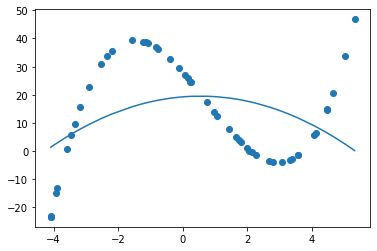

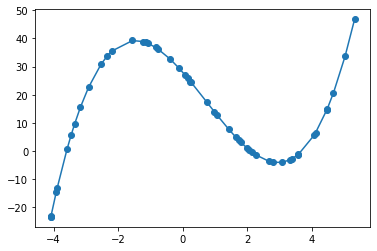

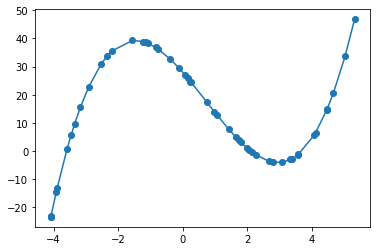

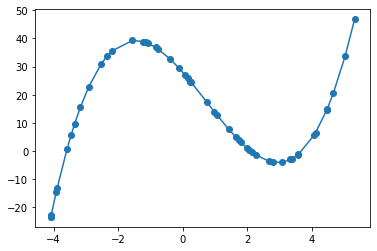

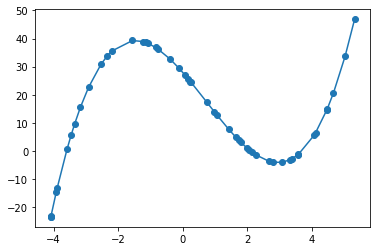

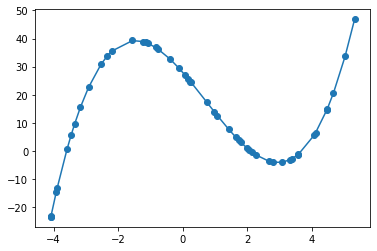

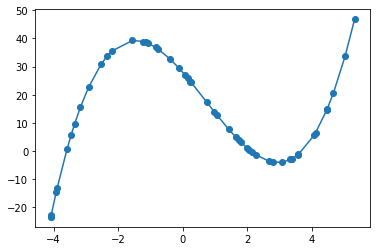

In [18]:
newT = numpy.linspace(-4, 5, num=1000)

for i in range(2, 9):
    wValues = [W(i)(t) for t in sortedT]
    pyplot.scatter(T, Y)
    pyplot.plot(sortedT, wValues)
    pyplot.show()

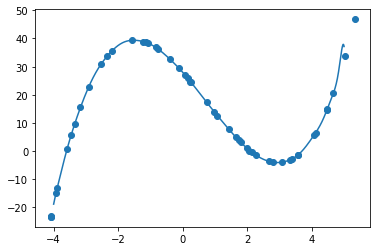

In [23]:
Values = [W(30)(t) for t in newT]
pyplot.scatter(T, Y)
pyplot.plot(newT, Values)
pyplot.show()

In [24]:
wValues = [W(7)(t) for t in sortedT]
print(wValues)

[-23.455603518336698, -23.23595484030344, -22.852684199950566, -14.825661217586223, -13.082213201009186, 0.5358347919411347, 5.605950789236429, 9.63364098283704, 15.58948387283293, 22.662610004013434, 30.801457173625348, 33.69841306251382, 35.54245787701741, 39.269856014199185, 38.94526408566135, 38.6036346861909, 38.32729864310262, 36.77196293406222, 36.37551240546121, 32.71001980024358, 29.582659000087613, 26.890955599392516, 25.70666499951055, 24.6930602497399, 24.328148386633842, 17.36438690590445, 14.039181302742229, 12.565554016492552, 7.593901389107411, 4.799090209045998, 3.7527414717786582, 3.0998133176199674, 0.980772034888885, 0.3458288267777473, -0.3769954880653329, -1.3510997439934995, -3.637200761199981, -3.9961679132479655, -4.019383196674375, -3.1008069085706267, -2.8560563631493654, -1.2734274475974738, -1.177805561703151, 5.4708278685242755, 6.5164940193416045, 14.678450853310562, 15.14188398874219, 20.645746787868962, 33.51169698295653, 46.867805027983316]
